In [1]:
suppressPackageStartupMessages(library(tidyverse))
library(ggrepel)

Warning message:
"package 'ggrepel' was built under R version 3.6.3"

In [2]:
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 100)

In [3]:
imdb_movies <- read_csv('imdb/IMDb_movies.csv', col_types = cols())

imdb_movies <- imdb_movies %>% select(-actors, -description)

head(imdb_movies)

imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NA,Charles Tait,Charles Tait,J. and N. Tait,6.1,537,$ 2250,NA,NA,NA,7,7
tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NA,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,5.9,171,NA,NA,NA,NA,4,2
tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,5.2,420,$ 45000,NA,NA,NA,24,3
tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,7.0,2019,NA,NA,NA,NA,28,14
tt0002199,"From the Manger to the Cross; or, Jesus of Nazareth","From the Manger to the Cross; or, Jesus of Nazareth",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,Gene Gauntier,Kalem Company,5.7,438,NA,NA,NA,NA,12,5
tt0002423,Madame DuBarry,Madame DuBarry,1919,1919-11-26,"Biography, Drama, Romance",85,Germany,German,Ernst Lubitsch,"Norbert Falk, Hanns Kräly",Projektions-AG Union (PAGU),6.8,709,NA,NA,NA,NA,11,9


In [4]:
str(imdb_movies)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	81273 obs. of  20 variables:
 $ imdb_title_id        : chr  "tt0000574" "tt0001892" "tt0002101" "tt0002130" ...
 $ title                : chr  "The Story of the Kelly Gang" "Den sorte drøm" "Cleopatra" "L'Inferno" ...
 $ original_title       : chr  "The Story of the Kelly Gang" "Den sorte drøm" "Cleopatra" "L'Inferno" ...
 $ year                 : num  1906 1911 1912 1911 1912 ...
 $ date_published       : chr  "1906-12-26" "1911-08-19" "1912-11-13" "1911-03-06" ...
 $ genre                : chr  "Biography, Crime, Drama" "Drama" "Drama, History" "Adventure, Drama, Fantasy" ...
 $ duration             : num  70 53 100 68 60 85 120 120 55 121 ...
 $ country              : chr  "Australia" "Germany, Denmark" "USA" "Italy" ...
 $ language             : chr  NA NA "English" "Italian" ...
 $ director             : chr  "Charles Tait" "Urban Gad" "Charles L. Gaskill" "Francesco Bertolini, Adolfo Padovan" ...
 $ writer               : c

In [5]:
print(names(imdb_movies))

 [1] "imdb_title_id"         "title"                 "original_title"       
 [4] "year"                  "date_published"        "genre"                
 [7] "duration"              "country"               "language"             
[10] "director"              "writer"                "production_company"   
[13] "avg_vote"              "votes"                 "budget"               
[16] "usa_gross_income"      "worlwide_gross_income" "metascore"            
[19] "reviews_from_users"    "reviews_from_critics" 


In [6]:
oscar_award <- read_csv('imdb/the_oscar_award.csv', col_types=cols())
head(oscar_award)

year_film,year_ceremony,ceremony,category,name,film,winner
1927,1928,1,ACTOR,Richard Barthelmess,The Noose,FALSE
1927,1928,1,ACTOR,Emil Jannings,The Last Command,TRUE
1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,FALSE
1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,TRUE
1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,FALSE
1927,1928,1,ART DIRECTION,Rochus Gliese,Sunrise,FALSE


In [7]:
str(oscar_award)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	10395 obs. of  7 variables:
 $ year_film    : num  1927 1927 1927 1927 1927 ...
 $ year_ceremony: num  1928 1928 1928 1928 1928 ...
 $ ceremony     : num  1 1 1 1 1 1 1 1 1 1 ...
 $ category     : chr  "ACTOR" "ACTOR" "ACTRESS" "ACTRESS" ...
 $ name         : chr  "Richard Barthelmess" "Emil Jannings" "Louise Dresser" "Janet Gaynor" ...
 $ film         : chr  "The Noose" "The Last Command" "A Ship Comes In" "7th Heaven" ...
 $ winner       : logi  FALSE TRUE FALSE TRUE FALSE FALSE ...
 - attr(*, "spec")=
  .. cols(
  ..   year_film = col_double(),
  ..   year_ceremony = col_double(),
  ..   ceremony = col_double(),
  ..   category = col_character(),
  ..   name = col_character(),
  ..   film = col_character(),
  ..   winner = col_logical()
  .. )


# Histograma de filmes por ano

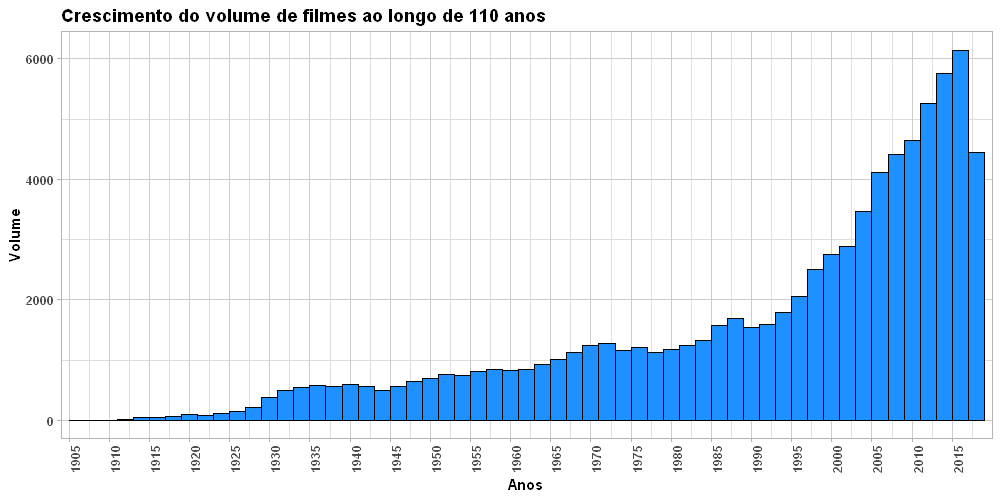

In [8]:
imdb_movies %>% 
        ggplot(aes(x = year)) +
        geom_histogram(binwidth = 2, fill = 'dodgerblue', color = 'black') +
        scale_x_continuous(breaks = seq(1905, 2015, 5), expand = c(0,1)) +
        labs(title = "Crescimento do volume de filmes ao longo de 110 anos",
            x = "Anos", y = "Volume") +
        theme_light() +
        theme(text = element_text(face = "bold"),
                    panel.grid.major = element_line(colour = "gray80"),
                     axis.title = element_text(size = 11),
                     panel.background = element_rect(fill = "gray100")) +
        theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Países predominantes no cinema nos anos 1900 - 1950

In [9]:
country_1900_1950 <- imdb_movies %>%
                        filter(year %in% c(1900, 1950)) %>%
                        group_by(country) %>%
                        count() %>%
                        arrange(-n)
head(country_1900_1950, 10)

country,n
USA,227
UK,34
Italy,15
France,11
Mexico,9
Japan,4
Sweden,3
Denmark,2
East Germany,2
Egypt,2


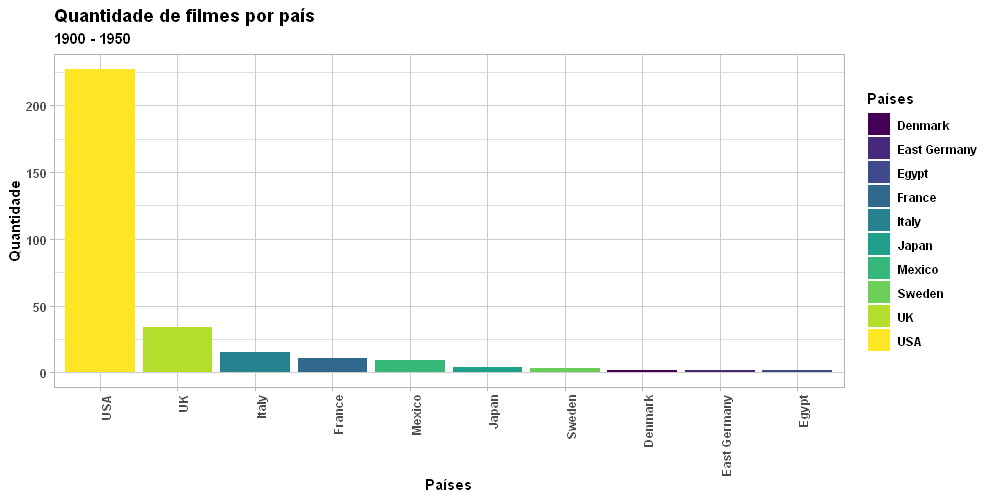

In [10]:
head(country_1900_1950, 10) %>%
            ggplot(aes(x = reorder(country, -n), y = n, fill = country)) +
            geom_bar(stat = 'identity') +
            scale_fill_viridis_d() +
            labs(title = 'Quantidade de filmes por país',
                subtitle = '1900 - 1950',
                y = 'Quantidade', x = 'Países', fill = 'Países') +
            theme_light() +
            theme(text = element_text(face = "bold"),
                    panel.grid.major = element_line(colour = "gray80"),
                     axis.title = element_text(size = 11),
                     panel.background = element_rect(fill = "gray100")) +
            theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Países predominantes no cinema nos anos 1951 - 2015

In [11]:
country_1951_2015 <- imdb_movies %>%
                        filter(year %in% c(1951, 2015)) %>%
                        group_by(country) %>%
                        count() %>%
                        arrange(-n)

head(country_1951_2015, 16)

country,n
USA,1029
India,306
UK,169
France,114
Japan,108
Canada,85
Turkey,81
Italy,63
Germany,54
South Korea,52


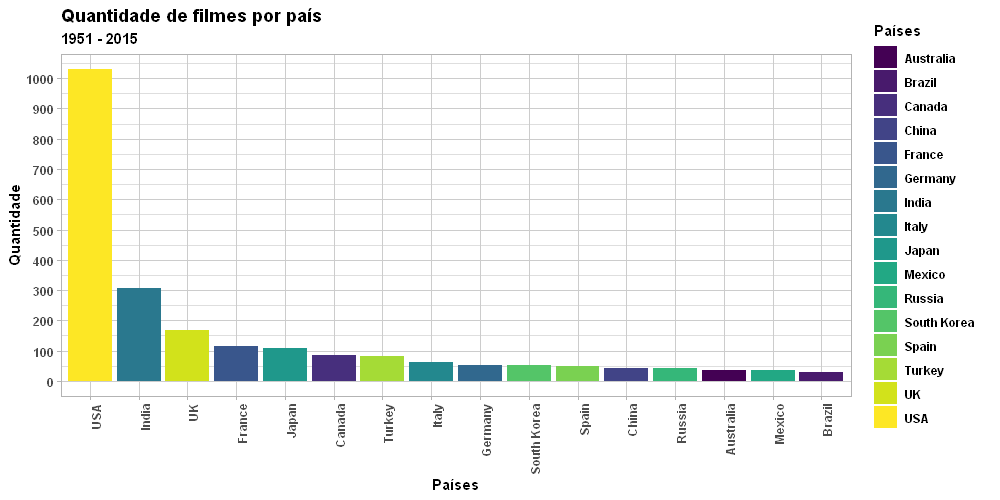

In [12]:
head(country_1951_2015, 16) %>%
            ggplot(aes(x = reorder(country, -n), y = n, fill = country)) +
            geom_bar(stat = 'identity') +
            scale_y_continuous(breaks = seq(0,1000,100)) +
            scale_fill_viridis_d() +
            labs(title = 'Quantidade de filmes por país',
                subtitle = '1951 - 2015',
                y = 'Quantidade', x = 'Países', fill = 'Países') +
            theme_light() +
            theme(text = element_text(face = "bold"),
                    panel.grid.major = element_line(colour = "gray80"),
                     axis.title = element_text(size = 11),
                     panel.background = element_rect(fill = "gray100")) +
            theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Gêneros

In [13]:
genres <- imdb_movies %>%
            select(genre) %>%
            group_by(genre) %>%
            count() %>%
            filter(n > 500) %>%
            arrange(-n)
genres

genre,n
Drama,11809
Comedy,7322
"Comedy, Drama",3822
"Drama, Romance",3252
"Comedy, Romance",2383
Horror,2189
"Comedy, Drama, Romance",2172
"Crime, Drama",1277
"Drama, Thriller",1270
"Action, Crime, Drama",1241


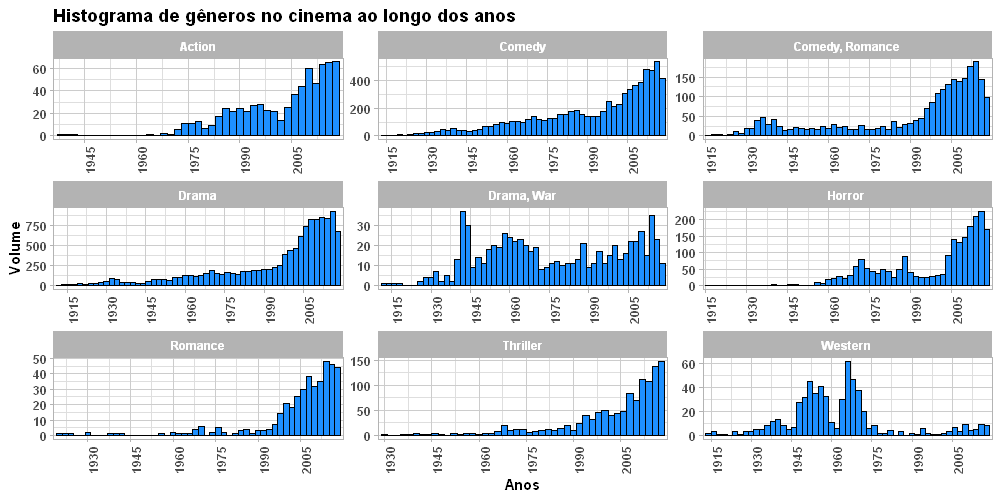

In [14]:
principal_genres <- c('Drama', 'Comedy', 'Horror', 'Action', 
                      'Western', 'Thriller', 'Drama, War', 'Romance', 'Comedy, Romance')

imdb_movies %>% 
        filter(genre %in% principal_genres) %>%
        ggplot(aes(x = year)) +
        geom_histogram(binwidth = 2, fill = 'dodgerblue', color = 'black') +
        facet_wrap(~ genre, scale = "free", shrink = TRUE) +
        scale_x_continuous(breaks = seq(1900, 2015, 15), expand = c(0,1)) +
        labs(title = "Histograma de gêneros no cinema ao longo dos anos",
            x = "Anos", y = "Volume") +
        theme_light() +
        theme(text = element_text(face = "bold"),
                    panel.grid.major = element_line(colour = "gray80"),
                     axis.title = element_text(size = 11),
                     panel.background = element_rect(fill = "gray100")) +
        theme(axis.text.x = element_text(angle = 90, hjust = 1))

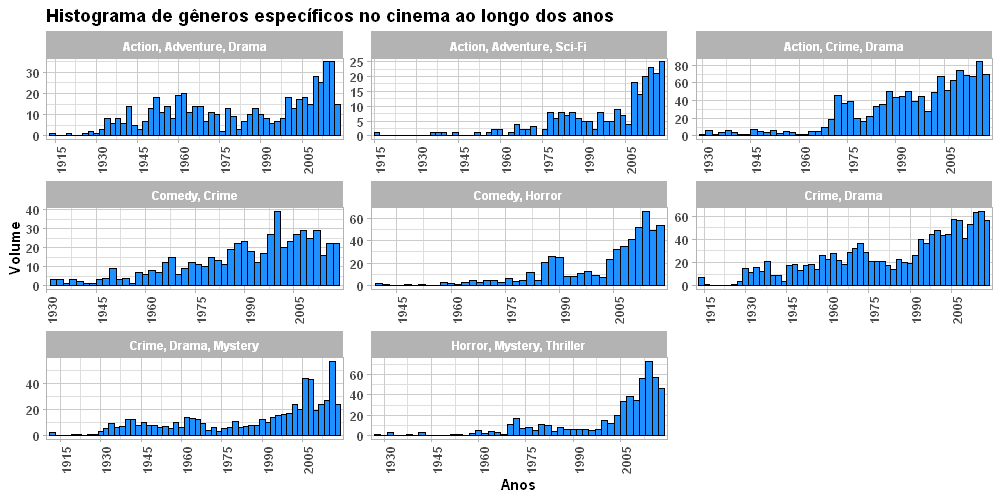

In [15]:
others_genres <- c('Crime, Drama, Mystery', 'Crime, Drama', 'Action, Crime, Drama', 
                   'Action, Adventure, Drama', 'Horror, Mystery, Thriller', 'Comedy, Horror', 'Comedy, Crime',
                  'Action, Adventure, Sci-Fi')

imdb_movies %>% 
        filter(genre %in% others_genres) %>%
        ggplot(aes(x = year)) +
        geom_histogram(binwidth = 2, fill = 'dodgerblue', color = 'black') +
        facet_wrap(~ genre, scale = "free", shrink = TRUE) +
        scale_x_continuous(breaks = seq(1900, 2015, 15), expand = c(0,1)) +
        labs(title = "Histograma de gêneros específicos no cinema ao longo dos anos",
            x = "Anos", y = "Volume") +
        theme_light() +
        theme(text = element_text(face = "bold"),
                    panel.grid.major = element_line(colour = "gray80"),
                     axis.title = element_text(size = 11),
                     panel.background = element_rect(fill = "gray100")) +
        theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Bilheteria dos filmes por gênero

In [16]:
imdb_movies.omit <- na.omit(imdb_movies)
head(imdb_movies.omit)

imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
tt0017136,Metropolis,Metropolis,1927,1927-02-06,"Drama, Sci-Fi",153,Germany,German,Fritz Lang,"Thea von Harbou, Thea von Harbou",Universum Film (UFA),8.3,148396,DEM 6000000,$ 1236166,$ 1349711,98,471,194
tt0021749,City Lights,City Lights,1931,1931-08-21,"Comedy, Drama, Romance",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,8.5,152716,$ 1500000,$ 19181,$ 32609,99,270,120
tt0027977,Modern Times,Modern Times,1936,1936-10-16,"Comedy, Drama, Family",87,USA,English,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,8.5,197969,$ 1500000,$ 163577,$ 445226,96,262,146
tt0029583,Snow White and the Seven Dwarfs,Snow White and the Seven Dwarfs,1937,1938-07-08,"Animation, Family, Fantasy",83,USA,English,"William Cottrell, David Hand","Jacob Grimm, Wilhelm Grimm",Walt Disney Productions,7.6,168735,$ 1499000,$ 184925486,$ 184925486,95,229,166
tt0031381,Gone with the Wind,Gone with the Wind,1939,1942-09-04,"Drama, History, Romance",238,USA,English,"Victor Fleming, George Cukor","Margaret Mitchell, Sidney Howard",Selznick International Pictures,8.1,269664,$ 3977000,$ 200852579,$ 402352579,97,808,183
tt0031679,Mr. Smith Goes to Washington,Mr. Smith Goes to Washington,1939,1940-05-03,"Comedy, Drama",129,USA,English,Frank Capra,"Sidney Buchman, Lewis R. Foster",Columbia Pictures,8.1,100206,$ 1900000,$ 144738,$ 144738,73,272,110


In [17]:
worlwide_gross_income_new <- str_replace_all(imdb_movies.omit$worlwide_gross_income, fixed('$'), '')

imdb_movies.omit$worlwide_gross_income <- as.numeric(worlwide_gross_income_new)

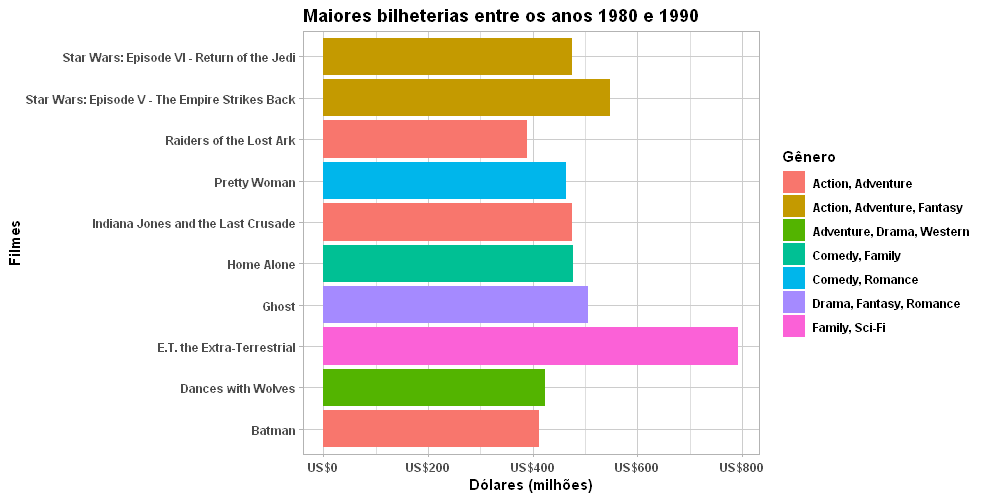

In [18]:
movies_top_1980 <- imdb_movies.omit %>%
                    filter(year %in% seq(1980, 1990)) %>%
                    select(title, worlwide_gross_income, genre) %>%
                    arrange(-worlwide_gross_income)

head(movies_top_1980, 10) %>%
    ggplot(aes(x = title, y = worlwide_gross_income, fill = factor(genre))) +
    geom_bar(stat='identity') +
    scale_y_continuous(labels = function(x) paste0("US$", round(x/1e6))) +
    labs(title = 'Maiores bilheterias entre os anos 1980 e 1990',
        x = 'Filmes', y = 'Dólares (milhões)',
        fill='Gênero') +
    coord_flip() +
    theme_light() +
    theme(text = element_text(face = "bold"),
            panel.grid.major = element_line(colour = "gray80"),
            axis.title = element_text(size = 11),
            panel.background = element_rect(fill = "gray100"),
            legend.position = 'right')

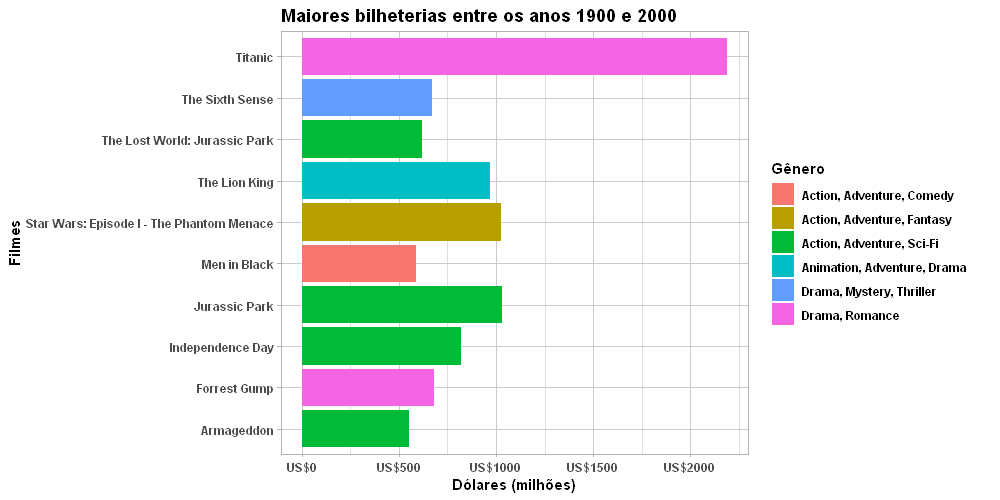

In [19]:
movies_top_1990 <- imdb_movies.omit %>%
                    filter(year %in% seq(1991, 2000)) %>%
                    select(title, worlwide_gross_income, genre) %>%
                    arrange(-worlwide_gross_income)

head(movies_top_1990, 10) %>%
    ggplot(aes(x = title, y = worlwide_gross_income, fill = factor(genre))) +
    geom_bar(stat='identity') +
    scale_y_continuous(labels = function(x) paste0("US$", round(x/1e6))) +
    labs(title = 'Maiores bilheterias entre os anos 1900 e 2000',
        x = 'Filmes', y = 'Dólares (milhões)',
        fill='Gênero') +
    coord_flip() +
    theme_light() +
    theme(text = element_text(face = "bold"),
            panel.grid.major = element_line(colour = "gray80"),
            axis.title = element_text(size = 11),
            panel.background = element_rect(fill = "gray100"),
            legend.position = 'right')

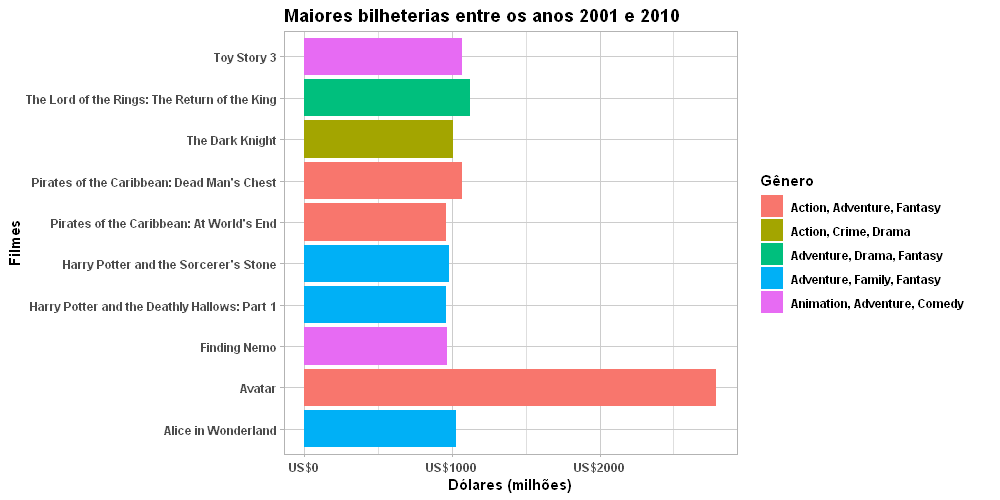

In [20]:
movies_top_2001 <- imdb_movies.omit %>%
                    filter(year %in% seq(2001, 2010)) %>%
                    select(title, worlwide_gross_income, genre) %>%
                    arrange(-worlwide_gross_income)

head(movies_top_2001, 10) %>%
    ggplot(aes(x = title, y = worlwide_gross_income, fill = factor(genre))) +
    geom_bar(stat='identity') +
    scale_y_continuous(labels = function(x) paste0("US$", round(x/1e6))) +
    labs(title = 'Maiores bilheterias entre os anos 2001 e 2010',
        x = 'Filmes', y = 'Dólares (milhões)',
        fill='Gênero') +
    coord_flip() +
    theme_light() +
    theme(text = element_text(face = "bold"),
            panel.grid.major = element_line(colour = "gray80"),
            axis.title = element_text(size = 11),
            panel.background = element_rect(fill = "gray100"),
            legend.position = 'right')

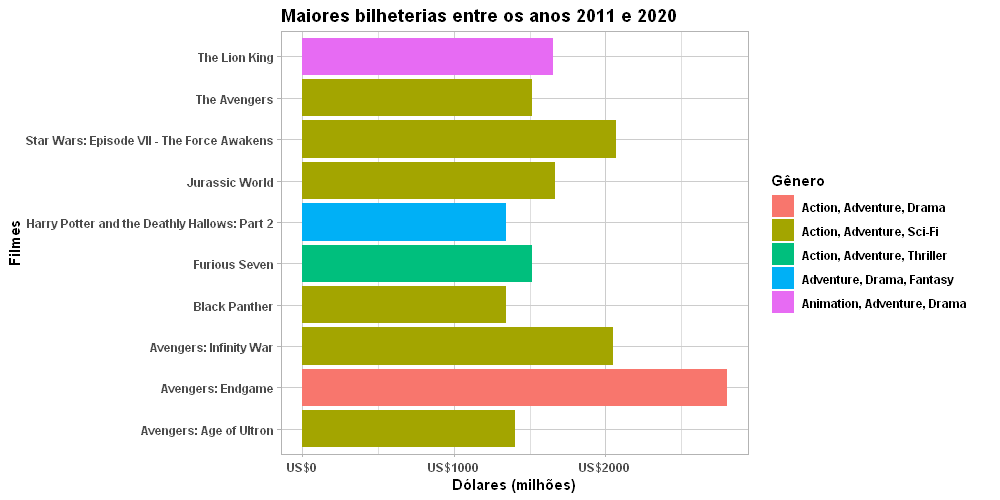

In [21]:
movies_top_2011 <- imdb_movies.omit %>%
                    filter(year %in% seq(2011, 2020)) %>%
                    select(title, worlwide_gross_income, genre) %>%
                    arrange(-worlwide_gross_income)

head(movies_top_2011, 10) %>%
    ggplot(aes(x = title, y = worlwide_gross_income, fill = factor(genre))) +
    geom_bar(stat='identity') +
    scale_y_continuous(labels = function(x) paste0("US$", round(x/1e6))) +
    labs(title = 'Maiores bilheterias entre os anos 2011 e 2020',
        x = 'Filmes', y = 'Dólares (milhões)',
        fill='Gênero') +
    coord_flip() +
    theme_light() +
    theme(text = element_text(face = "bold"),
            panel.grid.major = element_line(colour = "gray80"),
            axis.title = element_text(size = 11),
            panel.background = element_rect(fill = "gray100"),
            legend.position = 'right')

# Relação entre uma grande bilheteria com a pontuação do iMDB

In [22]:
titles_1991 <- imdb_movies.omit %>%
                filter(year %in% seq(1991, 2000)) %>%
                select(title, worlwide_gross_income, avg_vote) %>%
                top_n(10, wt = avg_vote)

row.names(titles_1991) <- titles_1991$title

Warning message:
"Setting row names on a tibble is deprecated."

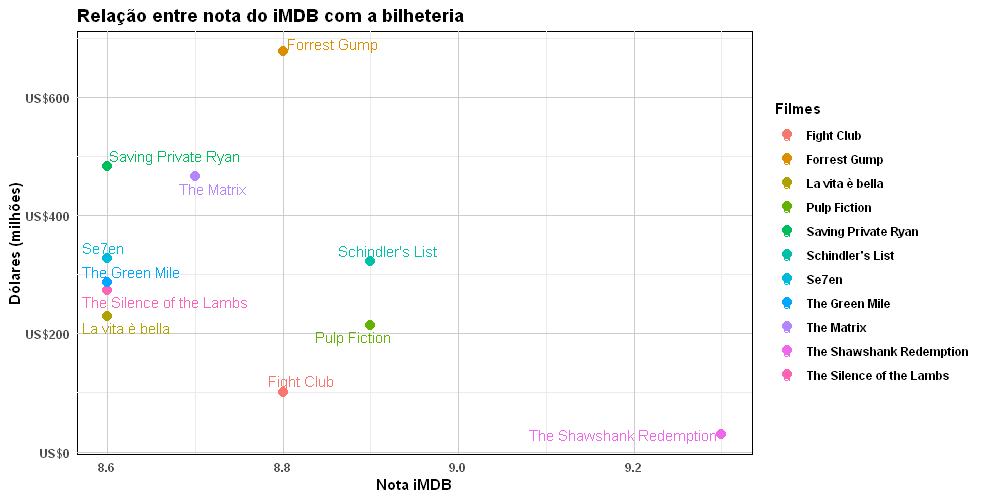

In [23]:
imdb_movies.omit %>%
        filter(year %in% seq(1991, 2000)) %>%
        select(title, worlwide_gross_income, avg_vote) %>%
        top_n(10, wt = avg_vote) %>%
        ggplot(aes(x = worlwide_gross_income, y = avg_vote, color = title)) +
        geom_point(size = 3) +
        geom_text_repel(label = rownames(titles_1991)) +
        scale_x_continuous(labels = function(x) paste0("US$", round(x/1e6))) +
        labs(title = 'Relação entre nota do iMDB com a bilheteria',
            x = 'Dólares (milhões)', y = 'Nota iMDB',
            color='Filmes') +
        coord_flip() +
        theme_minimal() +
        theme(text = element_text(face = "bold"),
                panel.grid.major = element_line(colour = "gray80"),
                axis.title = element_text(size = 11),
                panel.background = element_rect(fill = "gray100"),
                legend.position = 'right')

In [24]:
titles_2001 <- imdb_movies.omit %>%
                filter(year %in% seq(2001, 2010)) %>%
                select(title, worlwide_gross_income, avg_vote) %>%
                top_n(10, wt = avg_vote)

row.names(titles_2001) <- titles_2001$title

Warning message:
"Setting row names on a tibble is deprecated."

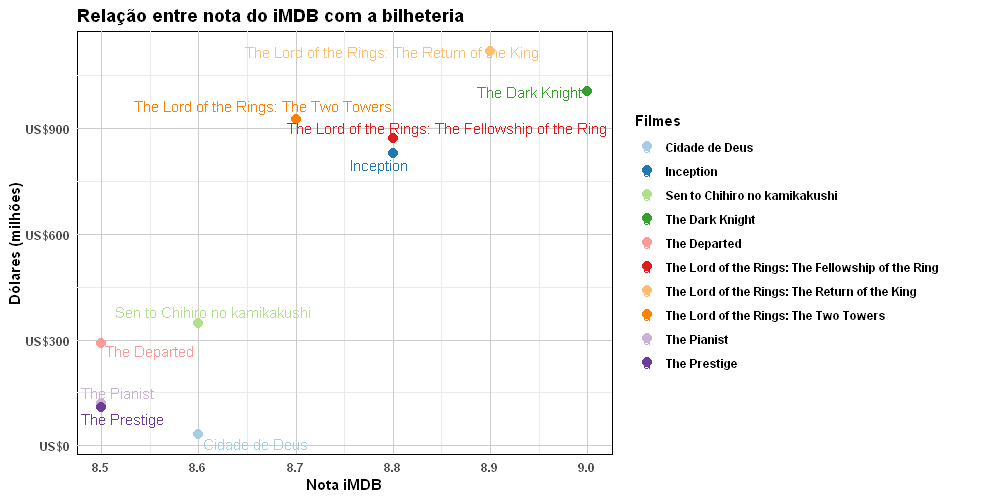

In [25]:
imdb_movies.omit %>%
        filter(year %in% seq(2001, 2010)) %>%
        select(title, worlwide_gross_income, avg_vote) %>%
        top_n(10, wt = avg_vote) %>%
        ggplot(aes(x = worlwide_gross_income, y = avg_vote, color = title)) +
        geom_point(size = 3) +
        geom_text_repel(label = rownames(titles_2001)) +
        scale_x_continuous(labels = function(x) paste0("US$", round(x/1e6))) +
        scale_color_brewer(palette = "Paired") +
        labs(title = 'Relação entre nota do iMDB com a bilheteria',
            x = 'Dólares (milhões)', y = 'Nota iMDB',
            color='Filmes') +
        coord_flip() +
        theme_minimal() +
        theme(text = element_text(face = "bold"),
                panel.grid.major = element_line(colour = "gray80"),
                axis.title = element_text(size = 11),
                panel.background = element_rect(fill = "gray100"),
                legend.position = 'right')

In [26]:
titles_2011 <- imdb_movies.omit %>%
                filter(year %in% seq(2011, 2020)) %>%
                select(title, worlwide_gross_income, avg_vote) %>%
                top_n(15, wt = avg_vote)

row.names(titles_2011) <- titles_2011$title

Warning message:
"Setting row names on a tibble is deprecated."

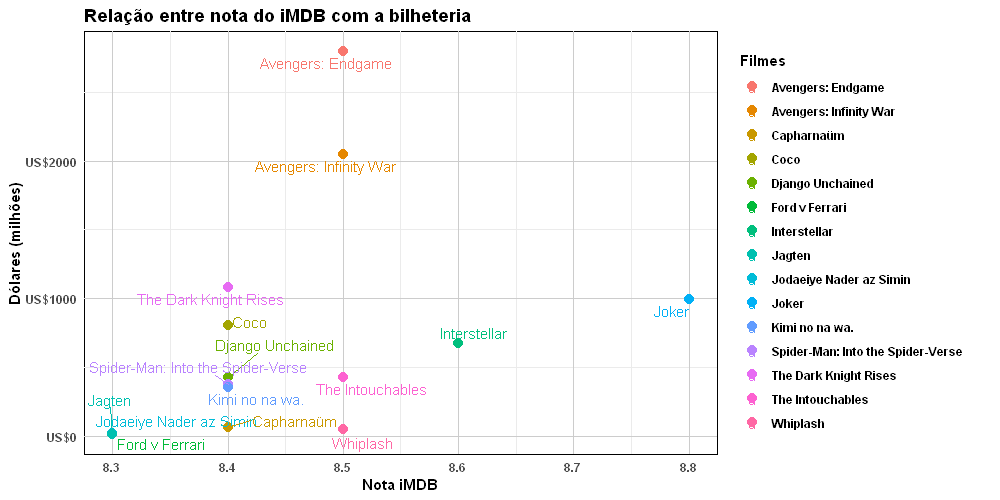

In [27]:
imdb_movies.omit %>%
        filter(year %in% seq(2011, 2020)) %>%
        select(title, worlwide_gross_income, avg_vote) %>%
        top_n(15, wt = avg_vote) %>%
        ggplot(aes(x = worlwide_gross_income, y = avg_vote, color = title)) +
        geom_point(size = 3) +
        geom_text_repel(label = rownames(titles_2011)) +
        scale_x_continuous(labels = function(x) paste0("US$", round(x/1e6))) +
        labs(title = 'Relação entre nota do iMDB com a bilheteria',
            x = 'Dólares (milhões)', y = 'Nota iMDB',
            color='Filmes') +
        coord_flip() +
        theme_minimal() +
        theme(text = element_text(face = "bold"),
                panel.grid.major = element_line(colour = "gray80"),
                axis.title = element_text(size = 11),
                panel.background = element_rect(fill = "gray100"),
                legend.position = 'right')

# Oscar

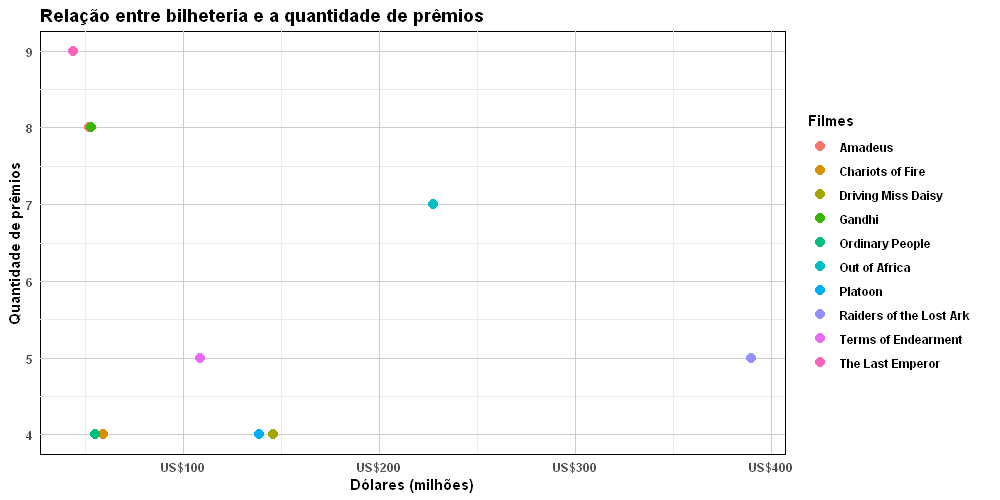

In [28]:
oscar.worlwide_gross_income <- na.omit(oscar_award) %>%
                                inner_join(imdb_movies.omit, by = c('film' = 'title')) %>%
                                filter(year %in% seq(1980,1990) & winner == TRUE) %>%
                                group_by(film, worlwide_gross_income) %>%
                                summarise('awards' = n()) %>%
                                arrange(-awards)

head(oscar.worlwide_gross_income, 10) %>%
        ggplot(aes(x = awards, y = worlwide_gross_income, color = film)) +
        geom_point() +
        geom_point(size = 3) +
        scale_y_continuous(labels = function(x) paste0("US$", round(x/1e6))) +
        labs(title = 'Relação entre bilheteria e a quantidade de prêmios',
            x = 'Quantidade de prêmios', y = 'Dólares (milhões)',
            color='Filmes') +
        coord_flip() +
        theme_minimal() +
        theme(text = element_text(face = "bold"),
                panel.grid.major = element_line(colour = "gray80"),
                axis.title = element_text(size = 11),
                panel.background = element_rect(fill = "gray100"),
                legend.position = 'right')

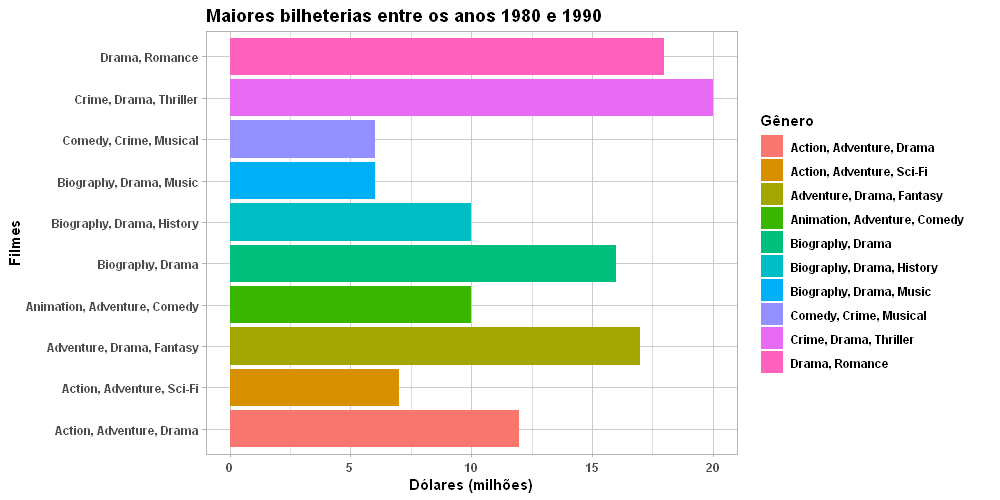

In [29]:
na.omit(oscar_award) %>%
        inner_join(imdb_movies.omit, by = c('film'='title')) %>%
        filter(year %in% seq(2000, 2010) & winner == TRUE) %>%
        group_by(genre) %>%
        summarise('awards' = n()) %>%
        arrange(-awards) %>%
        head(10) %>%
        ggplot(aes(x = genre, y = awards, fill = genre)) +
        geom_bar(stat='identity') +
        labs(title = 'Maiores bilheterias entre os anos 1980 e 1990',
                x = 'Filmes', y = 'Dólares (milhões)',
                fill='Gênero') +
        coord_flip() +
        theme_light() +
        theme(text = element_text(face = "bold"),
                panel.grid.major = element_line(colour = "gray80"),
                axis.title = element_text(size = 11),
                panel.background = element_rect(fill = "gray100"),
                legend.position = 'right')

# Martin Scorsese

In [30]:
imdb_movies %>%
        select(title, director, avg_vote) %>%
        filter(director %in% 'Martin Scorsese') %>%
        arrange(-avg_vote)

title,director,avg_vote
Goodfellas,Martin Scorsese,8.7
The Irishman,Martin Scorsese,8.7
The Departed,Martin Scorsese,8.5
Taxi Driver,Martin Scorsese,8.3
Raging Bull,Martin Scorsese,8.2
Casino,Martin Scorsese,8.2
The Wolf of Wall Street,Martin Scorsese,8.2
Shutter Island,Martin Scorsese,8.1
The King of Comedy,Martin Scorsese,7.8
After Hours,Martin Scorsese,7.7
